In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
M = 100
np.random.seed(7777)

a = np.random.random()
b = np.random.random()

In [7]:
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, M)

In [8]:
x = np.arange(-5, 5, 0.1)

In [9]:
y = a * x + b + noise

In [84]:
epochs = 1000
lr = 0.05
seta_0 = 1
seta_1 = 0
prev = 0
err_list = []
seta_0_list = []
seta_1_list = []
for i in range(epochs):
    err1 = 0
    err2 = 0
    for x_i, y_i in zip(x, y):
        y_hat = x_i * seta_1 + seta_0
        err = y_i - y_hat
        err1 += err
        err2 += err * x_i
    
    seta_1 = seta_1 + lr * err2 / M
    seta_0 = seta_0 + lr * err1 / M
    
    #history
    err_list.append(-1 * err1/M)
    seta_0_list.append(seta_0)
    seta_1_list.append(seta_1)
    
    # checking convergence
    if abs(prev - err1/M) < pow(0.1, 20) :
        break
    
    prev = err1/M

## [1] Plotting the input data

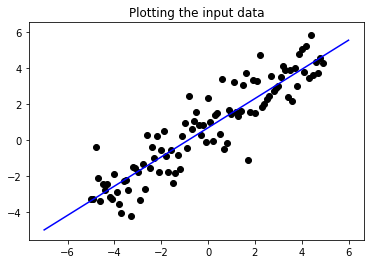

In [87]:
x_for_line = np.arange(-7, 7, 1)
y_for_line = x_for_line * a + b
plt.plot(x_for_line, y_for_line, color='blue')
plt.scatter(x, y, color='black')
plt.title("Plotting the input data")
plt.show()

## [2] Plotting the output results

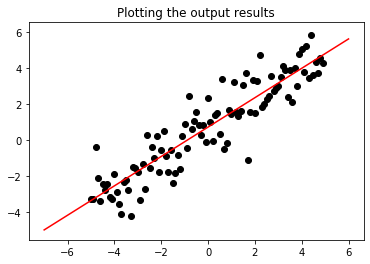

In [89]:
# draw result line
x_for_line = np.arange(-7, 7, 1)
y_for_line = x_for_line * seta_1 + seta_0
plt.plot(x_for_line, y_for_line, color='red')

plt.scatter(x, y, color='black')
plt.title("Plotting the output results")
plt.show()

## [3] Plotting the energy values

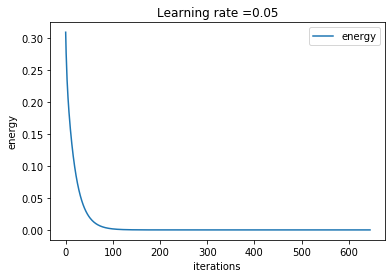

In [91]:
plt.plot(np.squeeze(err_list), label='energy')
plt.ylabel('energy')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()

## [4] Plotting the model parameters

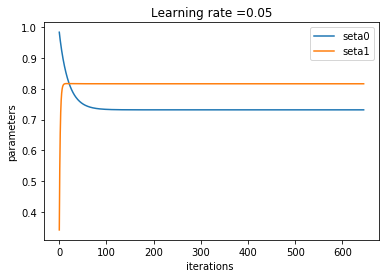

In [92]:
plt.plot(np.squeeze(seta_0_list), label='seta0')
plt.plot(np.squeeze(seta_1_list), label='seta1')
plt.ylabel('parameters')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()